<a href="https://colab.research.google.com/github/Ashis-Palai/SGD-Algorithm-to-predict-movie-ratings/blob/main/Recommendation_system_assignment_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='dark red'>SGD Algorithm to predict movie ratings</font>

In [ ]:
import pandas as pd
data=pd.read_csv('/content/ratings_train.csv')

print('shape of data is:',data.shape)
print('*'*30)
data.head()


shape of data is: (89992, 3)
******************************


,user_id,item_id,rating
0,772,36,3
1,471,228,5
2,641,401,4
3,312,98,4
4,58,504,5


<font color='dark pink'>Creating  adjacency matrix </font>

In [ ]:
from scipy.sparse import csr_matrix

adjacency_matrix = csr_matrix((data['rating'].values,(data['user_id'].values,data['item_id'].values)))


<font color='cyan'>Grader function - 1</font>

In [ ]:
def grader_matrix(matrix):
  assert(matrix.shape==(943,1681))
  return True
grader_matrix(adjacency_matrix)

True

<font color='dark pink'> SVD decompostion</font>

In [ ]:
from sklearn.utils.extmath import randomized_svd
import numpy as np 
U, Sigma, VT = randomized_svd(adjacency_matrix, n_components=5,n_iter=5, random_state=None)
print(U.shape)
print(Sigma.shape)
print(VT.shape)
U

(943, 5)
(5,)
(5, 1681)


array([[ 0.0662257 ,  0.00788807, -0.01253138, -0.0861225 ,  0.02480304],
       [ 0.01364432, -0.04889496,  0.05655369,  0.01579571, -0.01205521],
       [ 0.00543826, -0.02512786,  0.02002754,  0.03285407,  0.03508084],
       ...,
       [ 0.00738924, -0.02597368,  0.00634335, -0.01707454, -0.00739067],
       [ 0.02499924,  0.00447801,  0.02605652,  0.07734072, -0.0007585 ],
       [ 0.04337341, -0.00281476, -0.06077793, -0.03158913,  0.03984089]])

<font color='dark yellow'>Computing mean of ratings</font>

In [ ]:
from sklearn.utils import axis0_safe_slice
def m_u(ratings):
    '''In this function, we will compute mean for all the ratings'''
    mean_rating=ratings.mean(axis=0)

    return mean_rating

<font color='cyan'>Grader function -2 </font>

In [ ]:
def grader_mean(mu):
  assert(np.round(mu,3)==3.529)
  return True
mu=m_u(data['rating'])
grader_mean(mu)

True

<font color='dark yellow'>Initialising $B_{i}$ and $C_{j}$

In [ ]:

def initialize(dim): #This function helps to initilise the user bias and item bias wich will be helping to predict the ratings
    value=np.zeros_like(dim,dtype=float)

    return value
    



In [ ]:
dim1=adjacency_matrix.T[:].toarray()[0]
b_i=initialize(dim1)

dim2=adjacency_matrix[:].toarray()[0]
c_j=initialize(dim2)
dim2.shape


(1681,)

<font color='cyan'>Grader function -3 </font>

In [ ]:
def grader_dim(b_i,c_j):
  assert(len(b_i)==943 and np.sum(b_i)==0)
  assert(len(c_j)==1681 and np.sum(c_j)==0)
  return True
grader_dim(b_i,c_j)

True

<font color='dark yellow'>Computing dL/db_i</font>

In [ ]:
def derivative_db(user_id,item_id,rating,U,V,mu,alpha):
    '''In this function, we will compute dL/db_i'''
    return (alpha*2*b_i[user_id])-2*(rating-mu-b_i[user_id]-c_j[item_id]-np.dot(U[user_id],V.T[item_id]))


<font color='cyan'>Grader function -4 </font>

In [ ]:
def grader_db(value):
    assert(np.round(value,3)==-0.931)
    return True
U1, Sigma, V1 = randomized_svd(adjacency_matrix, n_components=2,n_iter=5, random_state=24)
# Please don't change random state
# Here we are considering n_componets = 2 for our convinence
alpha=0.01 
value=derivative_db(312,98,4,U1,V1,mu,alpha)
grader_db(value)

True

<font color='dark pink'>Computing dL/dc_j</font>





In [ ]:
def derivative_dc(user_id,item_id,rating,U,V,mu, alpha):
    '''In this function, we will compute dL/dc_j'''
    return (alpha*2*c_j[item_id])-2*(rating-mu-b_i[user_id]-c_j[item_id]-np.dot(U[user_id],V.T[item_id]))


<font color='cyan'>Grader function - 5 </font>

In [ ]:
def grader_dc(value):
    assert(np.round(value,3)==-2.929)
    return True
U1, Sigma, V1 = randomized_svd(adjacency_matrix, n_components=2,n_iter=5, random_state=24)
# Please don't change random state
# Here we are considering n_componets = 2 for our convinence
r=0.01 
value=derivative_dc(58,504,5,U1,V1,mu,r)
grader_dc(value)

True

<font color='dark yellow'>Computing MSE (mean squared error) for predicted ratings</font>


In [ ]:

from sklearn.metrics import mean_squared_error
alpha=0.001
lr=0.001
epoch=30
mse=[]
for k in range(epoch):
  pred_list=[]
  for i,j,rating in zip(data['user_id'].values,data['item_id'].values,data['rating'].values):
    db_=derivative_db(i,j,rating,U,VT,mu,alpha)
    dc_=derivative_dc(i,j,rating,U,VT,mu,alpha)
    b_i[i]=b_i[i]-(lr*db_)
    c_j[j]=c_j[j]-(lr*dc_)
    y_pred=mu+b_i[i]+c_j[j]+np.dot(U[i],VT.T[j])
    pred_list.append(y_pred)
  mse.append(mean_squared_error(data['rating'].values,pred_list))




<br>

In [ ]:
new_data=pd.read_csv('/content/user_info.csv.txt')

In [ ]:

X=new_data.drop(['is_male'],axis=1)
Y=new_data['is_male']
print('shape of user info data is',new_data.shape)
print('Shape of given input data is',X.shape)
print('Shape of given out put data is',Y.shape)
print('Shape of user matrix with diffrent dimensions is',U.shape)

shape of user info data is (943, 4)
Shape of given input data is (943, 3)
Shape of given out put data is (943,)
Shape of user matrix with diffrent dimensions is (943, 5)


<font color='dark pink'>checking correlation of the given input variables  </font>

In [ ]:

X_new=pd.concat([X,pd.DataFrame(U)],axis=1)
X_new.corr()


,user_id,age,orig_user_id,0,1,2,3,4
user_id,1.000000,0.003181,1.000000,-0.042386,-0.025564,-0.021899,0.070066,-0.010777
age,0.003181,1.000000,0.003181,-0.090003,0.217358,0.306089,0.196873,-0.116516
orig_user_id,1.000000,0.003181,1.000000,-0.042386,-0.025564,-0.021899,0.070066,-0.010777
0,-0.042386,-0.090003,-0.042386,1.000000,0.391237,-0.297107,-0.149629,0.002220
1,-0.025564,0.217358,-0.025564,0.391237,1.000000,0.085305,0.042961,-0.000638
2,-0.021899,0.306089,-0.021899,-0.297107,0.085305,1.000000,-0.032625,0.000484
3,0.070066,0.196873,0.070066,-0.149629,0.042961,-0.032625,1.000000,0.000244
4,-0.010777,-0.116516,-0.010777,0.002220,-0.000638,0.000484,0.000244,1.000000


<font color='dark yellow'>dropping orig_user_id column as its highly corelated and same as user_id </font>

In [ ]:
X_new_new=X_new.drop(['orig_user_id'],axis=1)

<font color='dark yellow'>Building logistic regression Model </font>

In [ ]:
from sklearn.linear_model import LogisticRegression as lr
clf=lr(random_state=0,C=100).fit(X_new_new,Y)
y_pred_new=clf.predict(X_new_new)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


<font color='dark yellow'>Building Confusion Matrix </font>

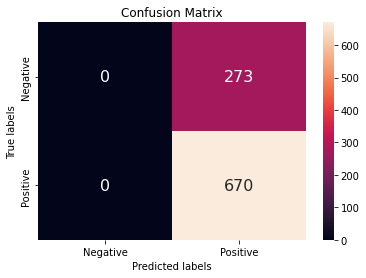

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
CM=confusion_matrix(Y,y_pred_new)
CM_matrix=pd.DataFrame(CM)


ax1= plt.subplot();
sns.heatmap(CM_matrix, annot=True,annot_kws={"size": 16}, fmt='g');
ax1.set_xlabel('Predicted labels');
ax1.set_ylabel('True labels'); 
ax1.set_ylim(2.0, 0)
ax1.set_title('Confusion Matrix');
ax1.xaxis.set_ticklabels(['Negative','Positive']); 
ax1.yaxis.set_ticklabels(['Negative','Positive']);
plt.show()


<font color='dark yellow'>**OBSERVATION:** </font>


1.   The model is a bias model for inverse regularisation C=100 
2.   The model is predicting everything as postive
3.   total false postive is 273
4.   total true positive is 670
5.   This model is using user component=5 for user matrix using randomized SVD






# <font color='dark yellow'>Performing TASK 2 with increasing component for user matrix </font>

In [ ]:
# Changing number of componets to 15 for user matrix , we are considering 15 dimensions for each user 

from sklearn.utils.extmath import randomized_svd
import numpy as np 
U1, Sigma1, VT1 = randomized_svd(adjacency_matrix, n_components=15,n_iter=5, random_state=None)
print(U1.shape)
print(Sigma.shape)
print(VT1.shape)

(943, 15)
(2,)
(15, 1681)


In [ ]:
X_component_15=X.drop(['orig_user_id'],axis=1)
X_component_new=pd.concat([X_component_15,pd.DataFrame(U1)],axis=1)


<font color='dark yellow'>Building logistic regression Model </font>

In [ ]:
from sklearn.linear_model import LogisticRegression as lr
clf_new=lr(random_state=0,C=100).fit(X_component_new,Y)
y_pred_component_new=clf_new.predict(X_component_new)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


<font color='dark yellow'>Building Confusion Matrix </font>

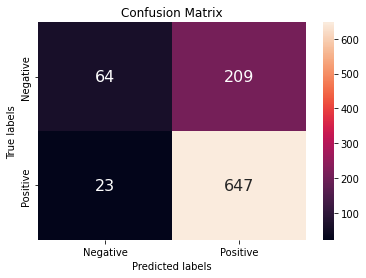

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
CM_new=confusion_matrix(Y,y_pred_component_new)
CM_matrix_new=pd.DataFrame(CM_new)


ax1= plt.subplot();
sns.heatmap(CM_matrix_new, annot=True,annot_kws={"size": 16}, fmt='g');
ax1.set_xlabel('Predicted labels');
ax1.set_ylabel('True labels'); 
ax1.set_ylim(2.0, 0)
ax1.set_title('Confusion Matrix');
ax1.xaxis.set_ticklabels(['Negative','Positive']); 
ax1.yaxis.set_ticklabels(['Negative','Positive']);
plt.show()

<font color='dark yellow'>**OBSERVATION:** </font>


1.   The model performance improved a bit from biasing for inverse regularisation C=100 
2.   total false postive is 207 and true postive is 647
3.   total true negative is 66 and false negative is 23
4.   This model is using user component=15 for user matrix using randomized SVD
